In [52]:
# Amir Andakhs

# importing necessary libs
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
from scipy import ndimage
import time

IMG_NAME = 'lego1.png'

def AmirAndakhs_22839936_Lab01Wk02(imgn =IMG_NAME):
    """
    Amir Andakhs, 22839936 and Lab01, Week 02
    a function that reads the image 'lego1.png', binarize it, performs the necessary
    morphological operations to find the correct number of objects in this image, and to print the number
    of objects in the image as the final output.
    """
    
    #     READING IMAGE AND SHOWING THE IMAGE
    im = cv2.imread(imgn)
    #     changing bgr(cv2 lib) to rgb(matplotlib) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()
    #     Converting from bgr to gray
    g = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    plt.imshow(g, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()
    #     Histigram of the image 
    plt.hist(g.ravel(), 256, [0, 256])
    plt.title('Grayscale Image Histogram')
    plt.show()
    #    creating a Black and white image using 160 as a treshold max = 255 and cv2.THRESH_BINARY type (Zero or 255)
    ret, bw = cv2.threshold(g, 160, 255, cv2.THRESH_BINARY)
    plt.imshow(bw, cmap='gray')
    plt.title('Black and white (threshold = 160)')
    plt.show()
    #     defining kernel for erode and dilate operations
    kernel =  np.ones((3,3))
    #    Apply morphological operation of erosion => one iteration is enough in our case
    erosion = cv2.erode(bw, kernel, iterations = 1)
    plt.imshow(erosion, cmap='gray')
    plt.title('eroded image')
    plt.show()
    #    Apply morphological operation of dilation => two iterations is enough in our case to remove small dot in image
    dilation = cv2.dilate(erosion, kernel, iterations = 2)
    plt.imshow(dilation, cmap='gray')
    plt.title('dilated image')
    plt.show()
    #    before labelling object and counting number of Objects we need to prepare data 
    # because in ndimage.label Any non-zero values in input are counted as features
    # we could achieve the same result in treshold function by using cv2.THRESH_BINARY_INV 
    dilation = cv2.bitwise_not(dilation)
    plt.imshow(dilation, cmap='gray')
    plt.title('Bitwise changed  image')
    plt.show()
    #    Laelling and counting the number of objects     
    L, num = ndimage.label(dilation, structure=kernel)
    print(f"Number of object(s) in this image is ====> {num}")
    #    finding objects labelled in the image  
    Objects = ndimage.find_objects(L)
    
    #    displaying each image with on second delay 
    for i in range(len(Objects)):
 
        plt.imshow(im[Objects[i]], cmap='gray')
        plt.title(f'Image{i+1}')
        plt.show()
        time.sleep(1) # Seconds

    

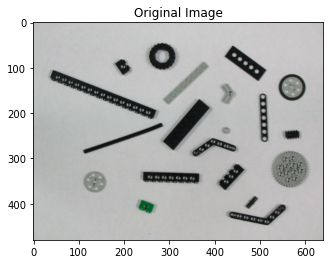

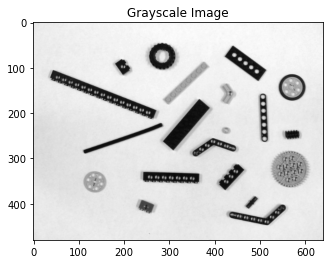

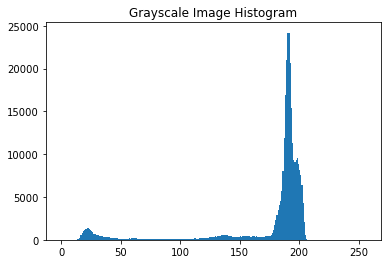

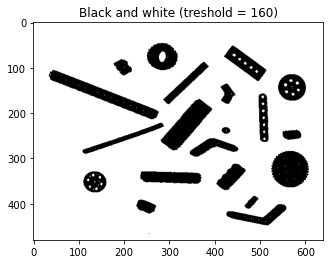

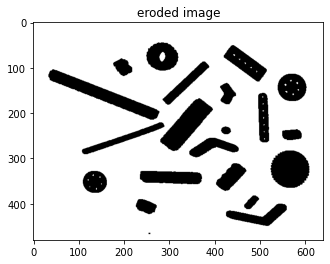

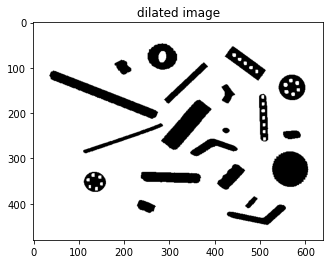

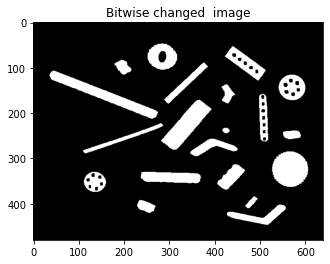

Number of object(s) in this image is ====> 20


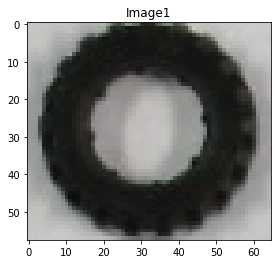

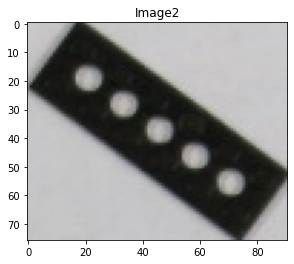

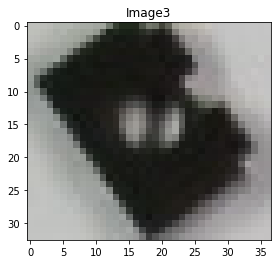

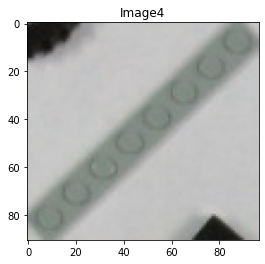

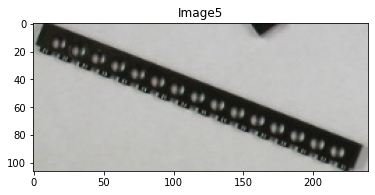

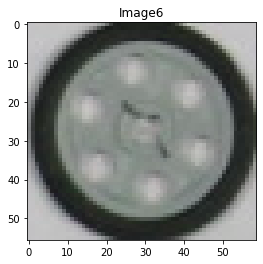

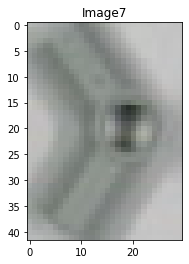

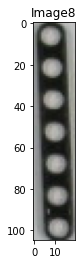

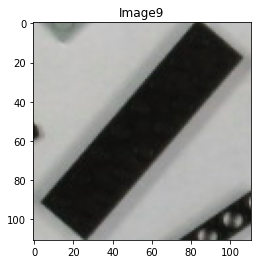

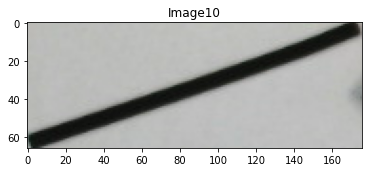

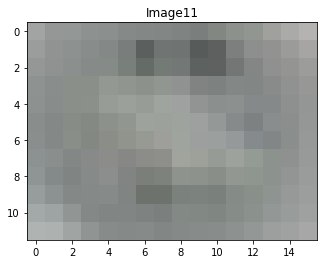

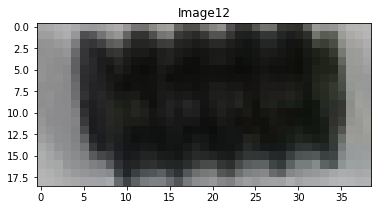

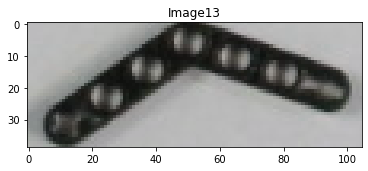

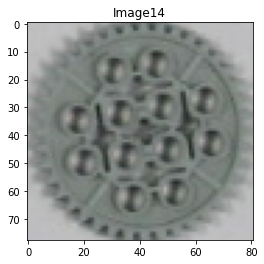

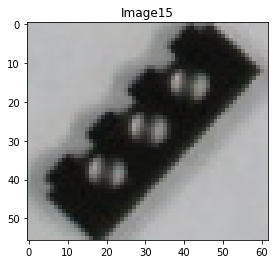

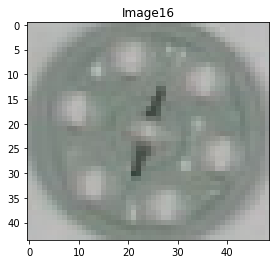

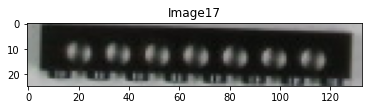

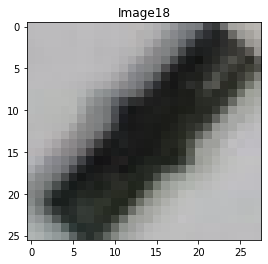

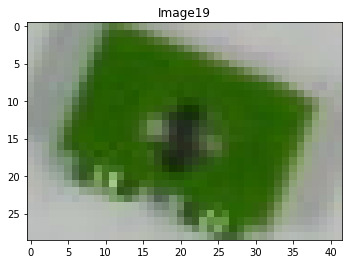

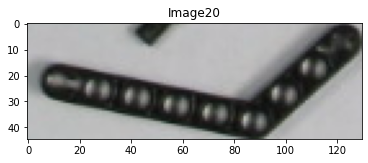

In [51]:
AmirAndakhs_22839936_Lab01Wk02()

## Documentation
* Note that the third value returned by the shape attribute corresponds to the number of channels in the
image (3 for RGB images)
    * im.shape
* Note that we need to convert the image from the BGR color space (used by
opencv) to the RGB color space (used by matplotlib) using the cv2.cvtColor() function before displaying
it
    * cv2.COLOR_BGR2GRAY from BGR to Gray scale
* Thresholding
    * Thresholding explanation: https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
    * Thresholding types: https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59
* Erosion: Erosion shrinks the image pixels, or erosion removes pixels on object boundaries
* Dilation: Dilation expands the image pixels, or it adds pixels on object boundaries.
    * https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756
* ndimage.label and ndimage.find_objects : 
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.find_objects.html#scipy.ndimage.find_objects